# RESIZE IMAGE

In [44]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

import math
import numpy as np

def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img=Image.open(os.path.join(foldername,filename)).resize((144,108))
        #img.resize((108,144))
        #img=mpimg.imread(os.path.join(foldername,filename))
        img = np.asarray(img)
        if img is not None:
            images.append(img)
    return images


In [45]:
import tensorflow as tf

In [82]:
 ds = tf.keras.utils.image_dataset_from_directory('/home/jupyter/asha-fm-data', label_mode=None, image_size=(108, 144))

Found 2360 files belonging to 1 classes.


In [83]:
ds = ds.map(lambda x: x/255)

In [85]:
ds = ds.map(lambda x: (x, x))

In [48]:
imgs = ds.as_numpy_iterator().__next__()

In [49]:
imgs[-5].shape

(144, 108, 3)

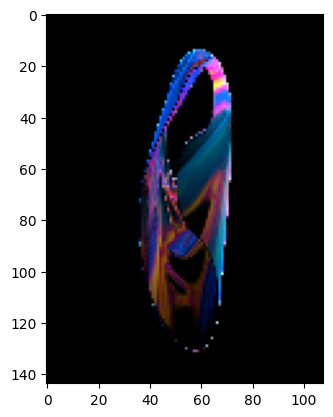

In [50]:
plt.imshow(imgs[1])

In [51]:
from tensorflow.image import resize

In [52]:
type(imgs[2])

numpy.ndarray

In [53]:


# size = (108, 144)

# resized_imgs = resize(imgs, size)

In [54]:
#data_tensor = ragged.constant(imgs[1:100:10])

#adding padding to the tensor to make all images the same shape

In [55]:
X_train = (np.array(imgs)) 

In [56]:
len(X_train)

32

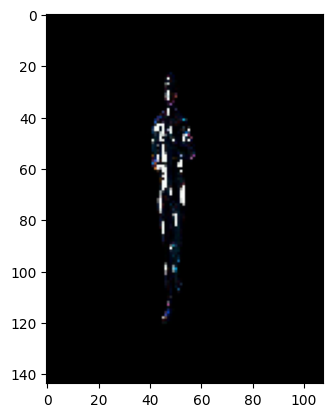

In [57]:
plt.imshow(imgs[0])

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [67]:
def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()
    
    encoder.add(Conv2D(8, (2,2), input_shape=(108, 144, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(16, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(32, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))     

    encoder.add(Flatten())
    encoder.add(Dense(latent_dimension, activation='tanh'))
    
    return encoder

In [68]:
encoder = build_encoder(latent_dimension=2)

In [69]:
from tensorflow.keras.layers import Reshape, Conv2DTranspose
def build_decoder(latent_dimension):
    # $CHALLENGIFY_BEGIN
    decoder = Sequential()
    decoder.add(Dense(3*4*8, activation='tanh', input_shape=(latent_dimension,)))
    decoder.add(Reshape((3, 4, 8)))  # no batch axis here
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (3, 3), strides=3, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(3, (3, 3), strides=3, padding='same', activation='relu'))
    
    return decoder

In [70]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 107, 143, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 71, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 70, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 35, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 34, 32)        2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 17, 32)       0

In [71]:
decoder = build_decoder(2)

In [72]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 96)                288       
                                                                 
 reshape (Reshape)           (None, 3, 4, 8)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 6, 8, 8)          264       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 12, 16, 8)        264       
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 36, 48, 8)        584       
 ranspose)                                                       
                                                      

In [77]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
def build_autoencoder(encoder, decoder):
    inp = Input((108, 144, 3))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    return autoencoder

autoencoder = build_autoencoder(encoder, decoder)

In [78]:
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse', optimizer='adam')

In [79]:
autoencoder = build_autoencoder(encoder, decoder)

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10)

compile_autoencoder(autoencoder)
autoencoder.fit(ds, epochs = 1000, batch_size = 32, verbose=50)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [76]:
prediction = autoencoder.predict(X_train, verbose=0, batch_size=32)# you can now display an image to see it is reconstructed well

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
    ax1.imshow((prediction[i] * 255).astype(np.uint8))
    ax2.imshow(X_train[i].reshape(108, 144, 3))
    plt.show()
    

ValueError: in user code:

    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 108, 144, 3), found shape=(32, 144, 108, 3)
